# 00. Домашнняя работа. Работа с датасетом

Импортирование полезных библиотек

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## 0.Описание задачи

Рассматриваемый датасет **Car Insurance Data** содержит 10 тыс строк и 19 признаков:

1. `ID` (NF) - Уникальный идентификатор клиента, любое натуральное число
2. `AGE` (CF) - Возрастная группа, 4 возможных значения: 16-25, 26-39, 40-64, 65+
3. `GENDER` (CF) - Пол, 2 возможных значения: female (женский), male (мужской)
4. `RACE` (CF) - Рассовая особенность, 2 возможных значения: majority (большинство), minority (меньшинство)
5. `DRIVING_EXPERIENCE` (CF) - Стаж вождения, 4 возможных значения: 0-9y, 10-19y, 20-29y, 30y+
6. `EDUCATION` (CF) - Образование, 3 возможных значения: none (остутствует), high school (среднее образование), university (университетское/высшее образование)
7. `INCOME` (CF) - Социальный класс, определяющийся в зависимости от дохода, 4 возможных значения: poverty ($18.000 - $23.050 annually), working class ($23.050 - $32.500 annually), middle class ($32.000 - $60.000 annually), upper class ($100.000 annually). Ref: <https://business.onehowto.com/article/what-income-class-am-i-11065.html>, as of 2017
8. `CREDIT_SCORE` (NF) - Кредитный рейтинг, любое действительное число от 0 до 1
9. `VEHICLE_OWNERSHIP` (BF) - Является владельцем автомобиля, 2 возможных значения: 0 - не владеет, 1 - владеет
10. `VEHICLE_YEAR` (CF) - Год выпуска автомобиля, 2 возможных значения: before 2015, after 2015
11. `MARRIED` (BF) - Состояние в браке на данный момент, 2 возможных значения: 0 - не состоит, 1 - состоит
12. `CHILDREN` (BF) - Наличие несовершеннолетних детей, 2 возможных значения: 0 - нет, 1 - есть
13. `POSTAL_CODE` (NF) - Почтовый индекс, любое натуральное число
14. `ANNUAL_MILEAGE` (NF) - Годовой пробег, любое натуральное число кратное тысячи. Значения указаны в милях
15. `VEHICLE_TYPE` (CF) - Тип транспортного средства, 2 возможных значения: sedan, sports car
16. `SPEEDING_VIOLATIONS` (NF) - Количество случаев превышения скорости, любое целое неотрицательное число
17. `DUIS` (NF) - Driving Under the Influence / Количество случаев вождения в состоянии алкогольного опъянения, любое целое неотрицательное число
18. `PAST_ACCIDENTS` (NF) - Количество аварий в прошлом, любое целое неотрицательное число
19. `OUTCOME` (BF) - Аппеляция клиента о выплате в связи со страховым случаем, 2 возможных значения: 0 - страховой случай не произошел или клиент не подал аппеляцию, 1 - произошел страховой случай и клиент подал аппеляцию

NF - Numerical Features

CF - Categorical Features

BF - Binary Features

## 1. Чтение данных

В exel таблице все значения в столбцах разделены с помощью запятой, что очень удобно для их считывания.

In [103]:
data = pd.read_csv("./Car_Insurance_Claim.csv", sep=",", engine="python")

In [104]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Всего в таблице содержатся данные о 10 тыс. клиентах. Всего 19 столбцов, 18 из которых являются признаками, а 1 является выходным классом.

In [105]:
data.shape

(10000, 19)

In [106]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [107]:
data.at[2, "GENDER"]

'female'

In [108]:
data[["EDUCATION", "CHILDREN"]].head()

,EDUCATION,CHILDREN
0,high school,1.0
1,none,0.0
2,high school,0.0
3,university,1.0
4,none,0.0


## 2. Визуализация данных

Выведем информацию о количестве непустых значений, среднем, среднем разбросе, и пороговые значения в каждом столбце

In [109]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


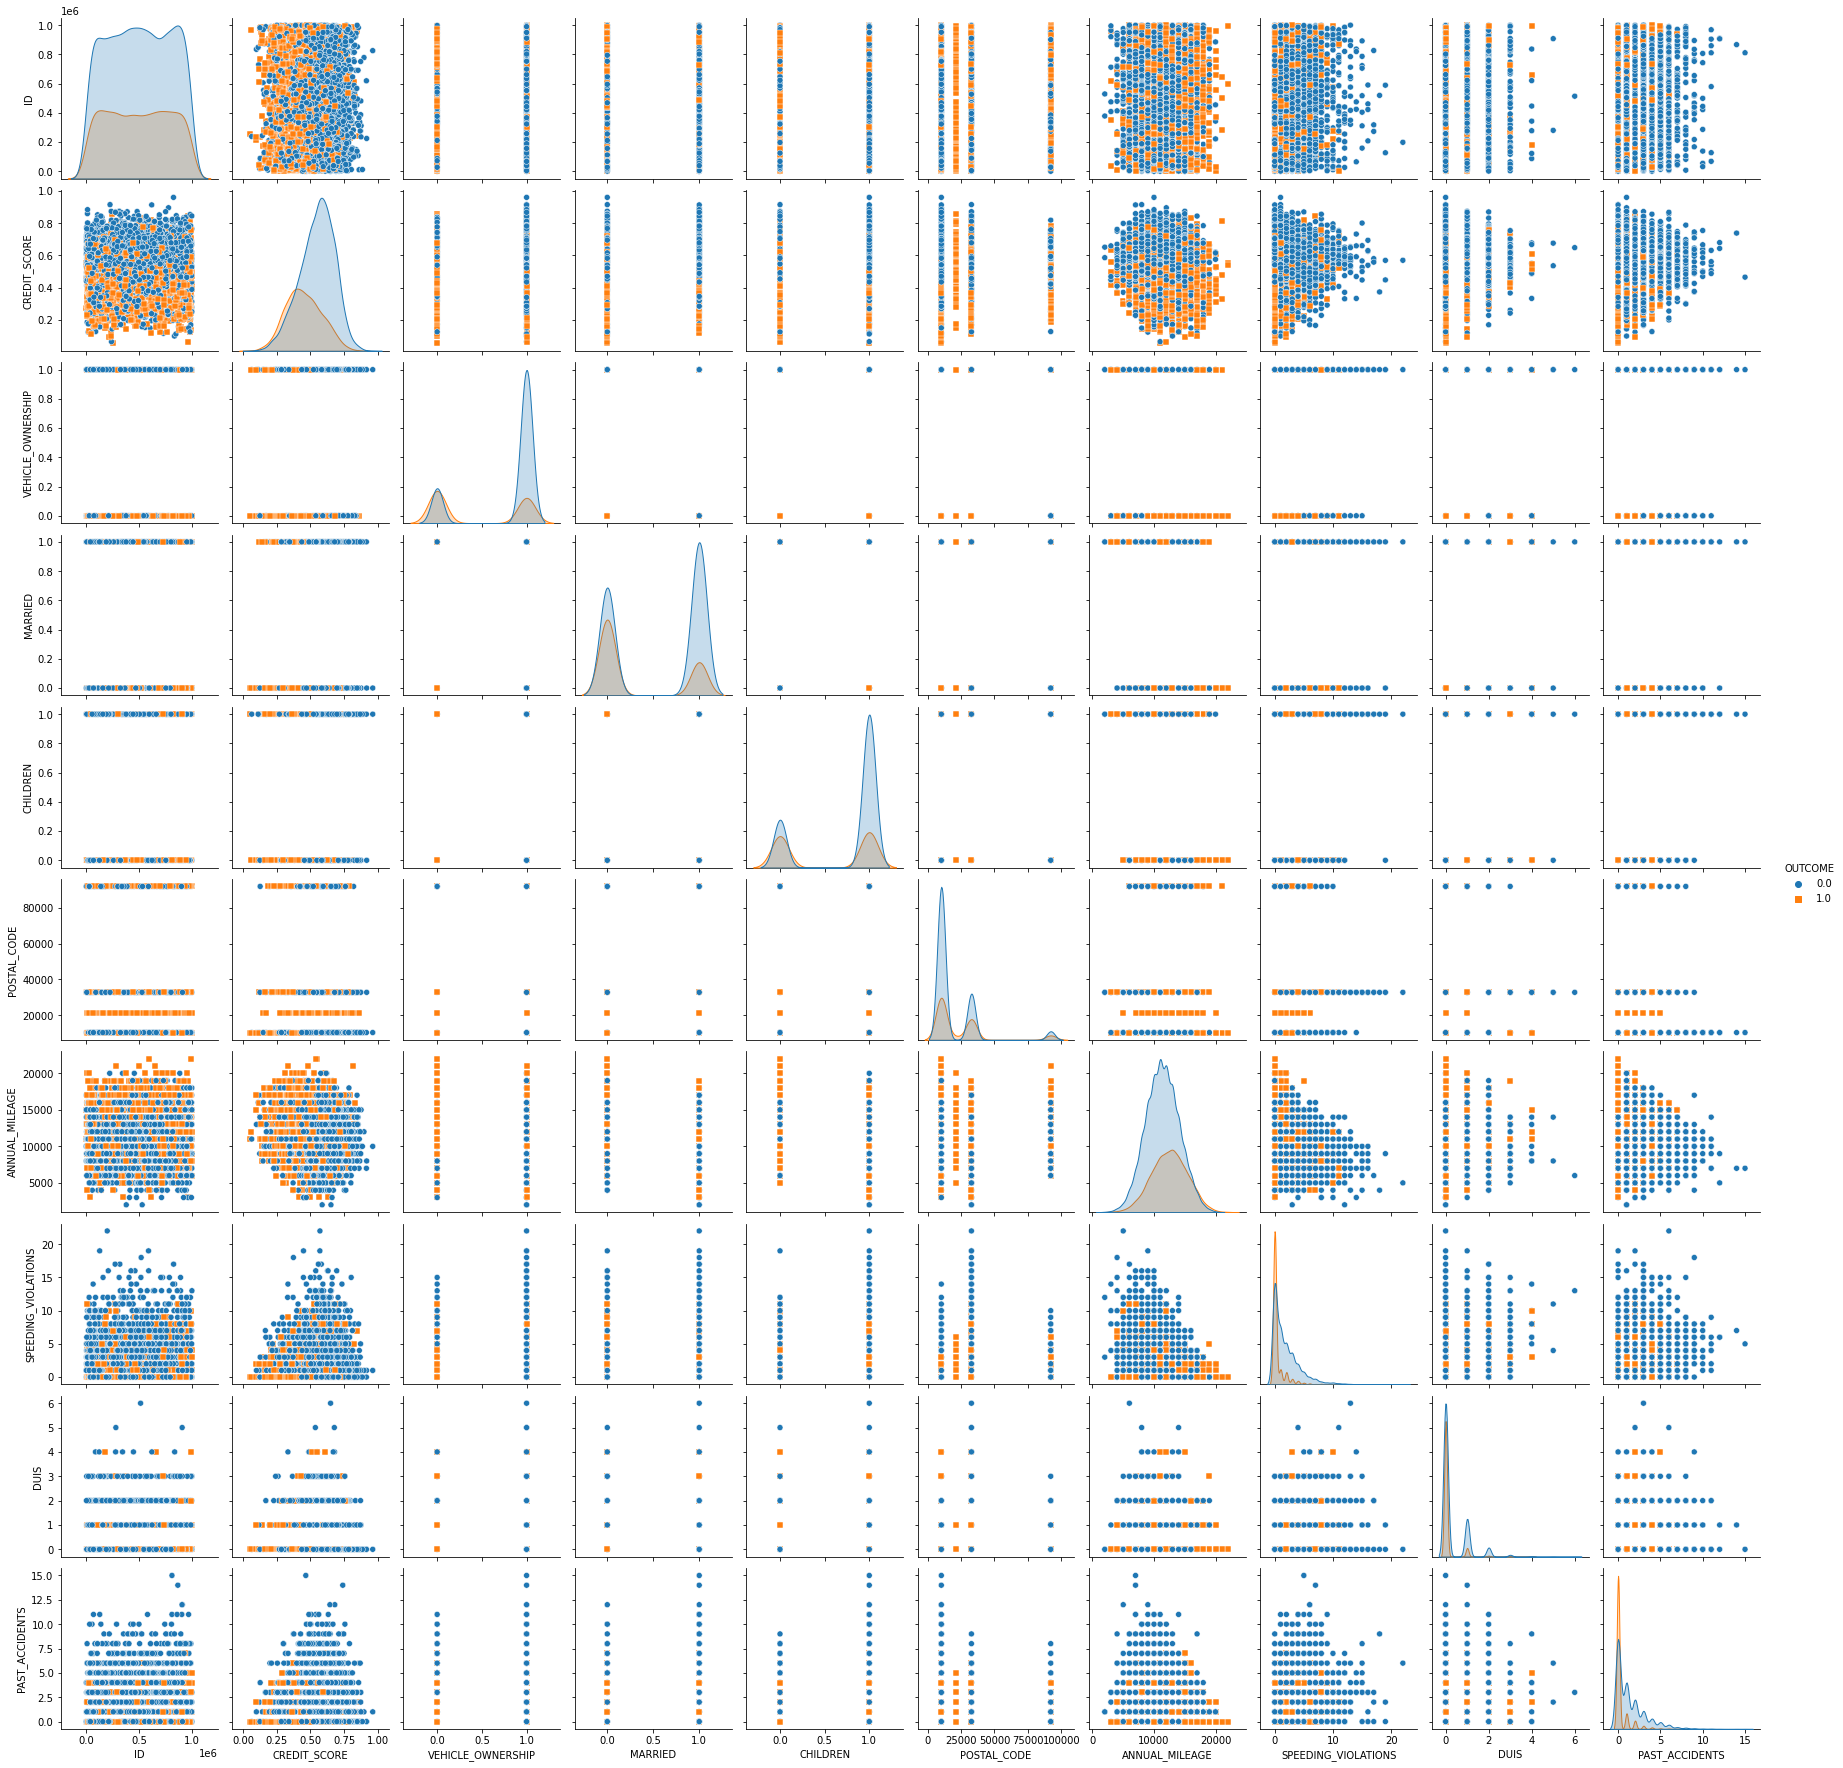

In [110]:
sns.pairplot(data, hue="OUTCOME", markers=["o", "s"])

### Некоторые интересные наблюдения по таблице

- Среднее значение кредитного рейтинга довольно низкое по сравнению со средними значениями по штатам. Такое значение (0.515) можно отнести к типу Very Poor. Ref: https://www.investopedia.com/average-credit-scores-by-state-5105100, as of 2022.

In [111]:
data["CREDIT_SCORE"].mean()

0.515812809602791

- В среднем клиенты находятся в браке в 50% случаев, но имеют детей в 70% случаев

In [112]:
data[["MARRIED", "CHILDREN"]].mean()

MARRIED     0.4982
CHILDREN    0.6888
dtype: float64

- Почтовые индексы слишком часто совпадают, возможно это говорит о том, что одно значение соответсвует сразу всему штату. Определить какому штату соответствуют индексы у нас не получилось. Ref: <http://amerikos.com/usa/post-s>

In [113]:
data["POSTAL_CODE"].unique()

array([10238, 32765, 92101, 21217], dtype=int64)

- Среднее значение годового пробега составляет 11697 миль, что очень похоже на реальность: Ref <https://www.google.ru/search?q=average+annual+mileage+USA>

In [114]:
data["ANNUAL_MILEAGE"].mean()

11697.003206900365

- Максимальное количество замеченных случаев вождения в нетрезвом виде у клиента может удивить - 6 раз. Но наказание за такое нарушение (как и все, что не закреплено в конституции) варьируется от штата к штату. Актуальная информация: <https://dui.drivinglaws.org/resources/state-dui-laws.htm>

In [115]:
data["DUIS"].max()

6

- Жизнь бывает непредсказуемой, из-за чего могут быть клиенты с 15-ю авариями, 22-мя нарушениями скорости 6 случаями вождения в нетрезвом виде. Но для алгоритмов машинного обучения такой необычный случай может стать помехой для успешного обучения, поэтому предлагаем дальше избавиться от подобного рода выбросов

In [116]:
data[["SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]].max()

SPEEDING_VIOLATIONS    22
DUIS                    6
PAST_ACCIDENTS         15
dtype: int64

- Количество непустых строк `ID` несколько превышает у признаков `CREDIT_SCORE` и `ANNUAL_MILEAGE`. Это говорит о том, что в этих признаках есть пустые значения, с ними тоже стоит поработать, но сначала обратим внимание на выбросы

In [117]:
data[["ID", "CREDIT_SCORE", "ANNUAL_MILEAGE"]].count()

ID                10000
CREDIT_SCORE       9018
ANNUAL_MILEAGE     9043
dtype: int64

### Борьба с выбросами

Еще раз взглянув на таблицу можно решить, какие выбросы желательно обработать (скорее всего выкинуть из рассмотрения)

In [118]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Считаем необходимым рассмотреть такие признаки, как: `CREDIT_SCORE`, `ANNUAL_MILEAGE`, `SPEEDING_VIOLATIONS`, `DUIS`, `PAST_ACCIDENTS`

#### CREDIT_SCORE

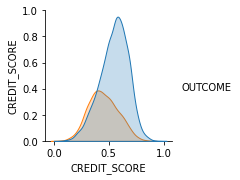

In [119]:
sns.pairplot(data[["CREDIT_SCORE", "OUTCOME"]], hue="OUTCOME")

<AxesSubplot:ylabel='CREDIT_SCORE'>

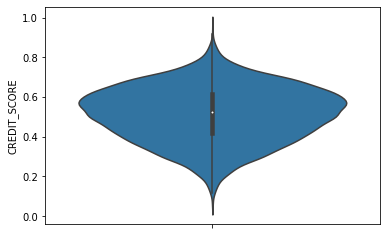

In [120]:
sns.violinplot(y="CREDIT_SCORE", data=data)

График напоминает нормальное распределение, выбросы не портят, гармонично дополняют картину на наш взгляд

#### ANNUAL_MILEAGE

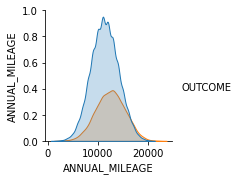

In [121]:
sns.pairplot(data[["ANNUAL_MILEAGE", "OUTCOME"]], hue="OUTCOME")

<AxesSubplot:ylabel='ANNUAL_MILEAGE'>

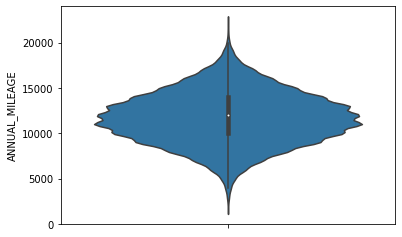

In [122]:
sns.violinplot(y="ANNUAL_MILEAGE", data=data)

Такое же красивое нормальное распределение

#### SPEEDING_VIOLATIONS

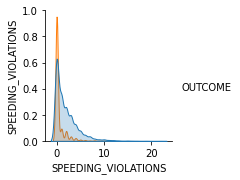

In [123]:
sns.pairplot(data[["SPEEDING_VIOLATIONS", "OUTCOME"]], hue="OUTCOME")

А вот тут явно есть выбросы, которые чрезвычайно сильно раситягивают график. Давайте рассмотрим их чуть подробнее и избавимся от них

<AxesSubplot:ylabel='SPEEDING_VIOLATIONS'>

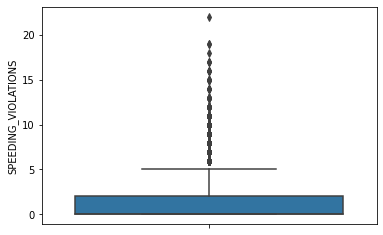

In [124]:
sns.boxplot(y="SPEEDING_VIOLATIONS", data=data)

<AxesSubplot:ylabel='SPEEDING_VIOLATIONS'>

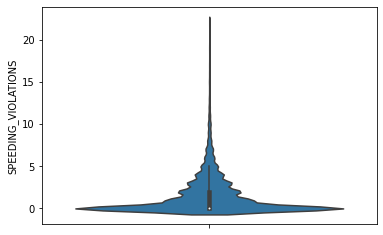

In [125]:
sns.violinplot(y="SPEEDING_VIOLATIONS", data=data)

In [126]:
data['SPEEDING_VIOLATIONS'].quantile(0.995)

12.0

In [127]:
rows_to_drop = data[data['SPEEDING_VIOLATIONS'] > data['SPEEDING_VIOLATIONS'].quantile(0.995)].index
len(rows_to_drop)

36

In [128]:
data = data.drop(rows_to_drop)

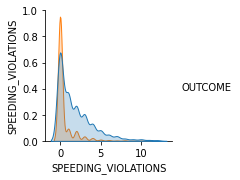

In [129]:
sns.pairplot(data[["SPEEDING_VIOLATIONS", "OUTCOME"]], hue="OUTCOME")

Теперь картина стала намного лучше

<AxesSubplot:ylabel='SPEEDING_VIOLATIONS'>

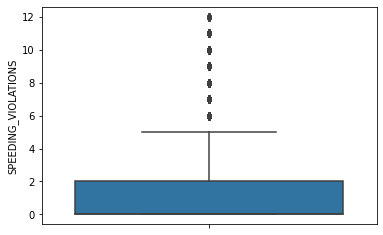

In [130]:
sns.boxplot(y="SPEEDING_VIOLATIONS", data=data)

<AxesSubplot:ylabel='SPEEDING_VIOLATIONS'>

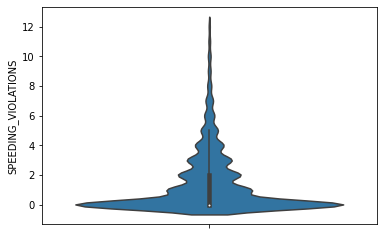

In [131]:
sns.violinplot(y="SPEEDING_VIOLATIONS", data=data)

In [132]:
rows_to_drop = data[data['SPEEDING_VIOLATIONS'] > 6].index
len(rows_to_drop)

364

Считаем, что можно было бы выкинуть еще немножко, но тогда пришлось бы выкинуть больше, чем на данный момент. Продолжим анализ выбросов на оставшихся колонках

#### DUIS

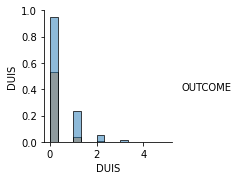

In [133]:
sns.pairplot(data[["DUIS", "OUTCOME"]], hue="OUTCOME", diag_kind="hist")

<AxesSubplot:ylabel='DUIS'>

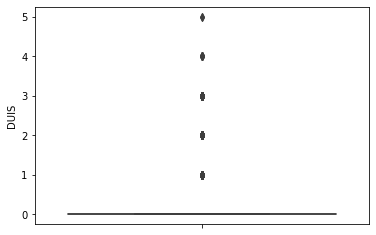

In [134]:
sns.boxplot(y="DUIS", data=data)

In [135]:
data['DUIS'].quantile(0.995)

3.0

In [136]:
rows_to_drop = data[data['DUIS'] > data['DUIS'].quantile(0.995)].index
len(rows_to_drop)

11

Имеет смысл избавиться от этих строк

In [137]:
data = data.drop(rows_to_drop)

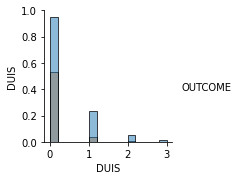

In [138]:
sns.pairplot(data[["DUIS", "OUTCOME"]], hue="OUTCOME", diag_kind="hist")

<AxesSubplot:ylabel='DUIS'>

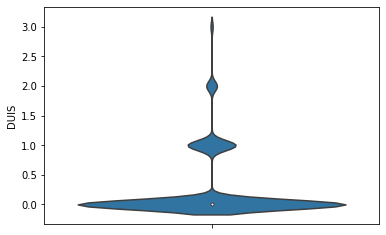

In [139]:
sns.violinplot(y="DUIS", data=data)

Осталось рассмотреть только `PAST_ACCIDENTS`

#### PAST_ACCIDENTS

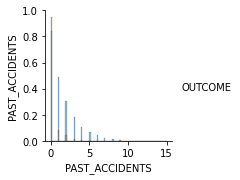

In [140]:
sns.pairplot(data[["PAST_ACCIDENTS", "OUTCOME"]], hue="OUTCOME", diag_kind="hist")

Видим, что выбросы явно нужно найти, и избавиться от них

In [141]:
data['PAST_ACCIDENTS'].quantile(0.997)

9.0

In [142]:
rows_to_drop = data[data['PAST_ACCIDENTS'] > data['PAST_ACCIDENTS'].quantile(0.997)].index
len(rows_to_drop)

20

In [143]:
data = data.drop(rows_to_drop)

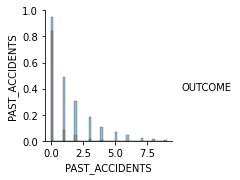

In [144]:
sns.pairplot(data[["PAST_ACCIDENTS", "OUTCOME"]], hue="OUTCOME", diag_kind="hist")

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

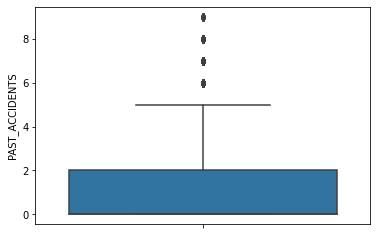

In [145]:
sns.boxplot(y="PAST_ACCIDENTS", data=data)

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

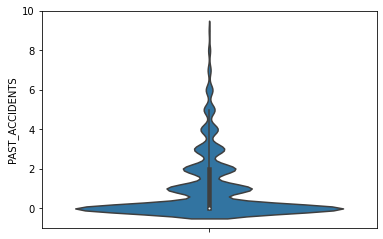

In [146]:
sns.violinplot(y="PAST_ACCIDENTS", data=data)

In [147]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9933.000000,8958.000000,9933.000000,9933.000000,9933.000000,9933.000000,8980.000000,9933.000000,9933.000000,9933.000000,9933.000000
mean,500324.015202,0.515425,0.695762,0.496627,0.687104,19829.693949,11717.483296,1.421122,0.230847,1.026477,0.315111
std,290063.709035,0.137871,0.460107,0.500014,0.463696,18954.182614,2809.666526,2.075291,0.530548,1.581522,0.464584
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,249418.000000,0.416721,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,501483.000000,0.524263,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.000000,0.000000,0.000000
75%,753743.000000,0.618279,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.000000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,12.000000,3.000000,9.000000,1.000000


### Матрица корреляции

In [148]:
corr_mat = data.corr(numeric_only=True)
corr_mat

C:\Users\Olyni\AppData\Local\Temp\ipykernel_15212\2083231324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001434,0.009389,0.014259,0.001234,0.006153,-0.001562,0.006526,0.007845,-0.002052,-0.010345
CREDIT_SCORE,0.001434,1.000000,0.312072,0.281680,0.220020,0.008303,-0.172061,0.210750,0.127950,0.182361,-0.324837
VEHICLE_OWNERSHIP,0.009389,0.312072,1.000000,0.175849,0.125261,-0.005688,-0.094753,0.131661,0.086871,0.118443,-0.378576
MARRIED,0.014259,0.281680,0.175849,1.000000,0.286401,0.011999,-0.462848,0.226525,0.121541,0.214206,-0.261116
CHILDREN,0.001234,0.220020,0.125261,0.286401,1.000000,0.020328,-0.446555,0.223889,0.115606,0.204610,-0.231180
POSTAL_CODE,0.006153,0.008303,-0.005688,0.011999,0.020328,1.000000,-0.132544,0.107855,0.032753,-0.119431,0.097252
ANNUAL_MILEAGE,-0.001562,-0.172061,-0.094753,-0.462848,-0.446555,-0.132544,1.000000,-0.314975,-0.112038,-0.185709,0.183585
SPEEDING_VIOLATIONS,0.006526,0.210750,0.131661,0.226525,0.223889,0.107855,-0.314975,1.000000,0.345421,0.448777,-0.298469
DUIS,0.007845,0.127950,0.086871,0.121541,0.115606,0.032753,-0.112038,0.345421,1.000000,0.256944,-0.193029
PAST_ACCIDENTS,-0.002052,0.182361,0.118443,0.214206,0.204610,-0.119431,-0.185709,0.448777,0.256944,1.000000,-0.315569


<AxesSubplot:>

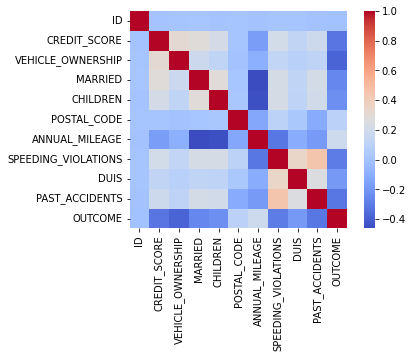

In [149]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

Рассмотрим более менее высокую положительную корреляцию: динамика увеличения и уменьшения значений совпадает

In [150]:
corr_mat.where(np.triu(corr_mat > 0.4, k=1)).stack().sort_values(ascending=False)

SPEEDING_VIOLATIONS  PAST_ACCIDENTS    0.448777
dtype: float64

Логично, чем больше у клиента случаев превышения скорости, тем больше аварий у него имеется за плечами

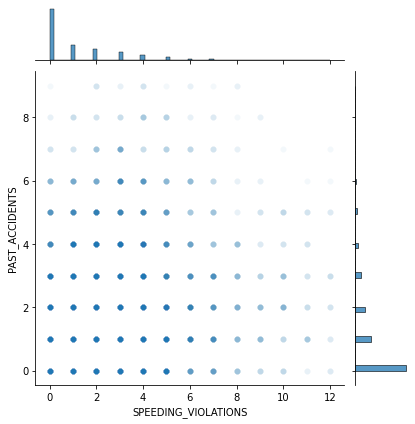

In [151]:
sns.jointplot(x='SPEEDING_VIOLATIONS', y='PAST_ACCIDENTS', alpha=.05, data=data)

Рассмотрим более менее высокую отрицательную корреляцию: динамика увеличения и уменьшения значений противоположна (уменьшается один, увеличивается второй)

In [152]:
corr_mat.where(np.triu(corr_mat < -0.4, k=1)).stack().sort_values(ascending=False)

CHILDREN  ANNUAL_MILEAGE   -0.446555
MARRIED   ANNUAL_MILEAGE   -0.462848
dtype: float64

Странно, если есть дети, то уменьшается годовой пробег. Видимо детей возят на автобусе. А супруг(а)? Может у него(нее) есть своя машина?

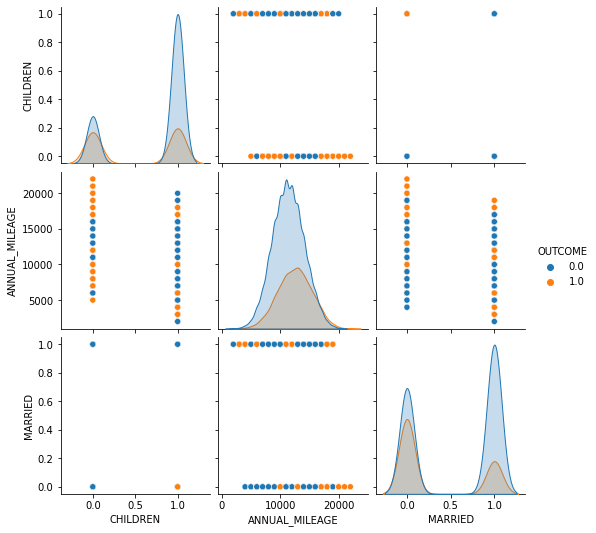

In [153]:
# sns.jointplot(x='CHILDREN', y='ANNUAL_MILEAGE', alpha=.05, data=data)
sns.pairplot(data[["CHILDREN", "ANNUAL_MILEAGE", "MARRIED", "OUTCOME"]], hue="OUTCOME")

Корреляция между некоторыми значения есть, но вот с целевым столбцом ее не обнаружено. Выведем для него все коэффициенты

In [154]:
corr_mat["OUTCOME"].sort_values(ascending=False)

OUTCOME                1.000000
ANNUAL_MILEAGE         0.183585
POSTAL_CODE            0.097252
ID                    -0.010345
DUIS                  -0.193029
CHILDREN              -0.231180
MARRIED               -0.261116
SPEEDING_VIOLATIONS   -0.298469
PAST_ACCIDENTS        -0.315569
CREDIT_SCORE          -0.324837
VEHICLE_OWNERSHIP     -0.378576
Name: OUTCOME, dtype: float64

Можно сделать легкие предположения:

+ Чем больше пользуются машиной, тем выше шанс страхового случая
+ Жители штатов с большим почтовым кодом чуть чуть чаще попадают под страховые случаи
+ Отсутствие нарушений скорости, аварий в прошлом и вождение в нетрезвом состоянии говорят о том, что страховой случай более вероятен. Видимо все таки люди меняются, учатся на ошибках и стараются водить аккуратнее (для нас это звучит странно)
+ Низкий кредитный рейтинг говорит о меньшей ответсвенности и соответсвенно приводит к аппеляциям по страховому случаю
+ Владение автомобилем ведет к большей аккуратности. Клиенты ценят свои вещи, но в тоже время, не ценят чужие

## 3. Рассмотрение пропущенных значений

In [155]:
data.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           975
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         953
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Пропущенные значения имеются в таких признаках, как `CREDIT_SCORE` и `ANNUAL_MILEAGE`. Пропущенные значения состовляют существенную часть (10%) от общего числа, поэтому просто удалить соотвествующие им строки не разумно. Так же не разумно удалить эти признаки совсем, в том числе потому что в них заложена полезная информация, которая может пригодиться для классификации.

Это числовые признаки, поэтому их значения стоит заполнить либо средним, либо медианным. Для `CREDIT_SCORE` и `ANNUAL_MILEAGE` средние и медианные значения не сильно отличаются, но для `ANNUAL_MILEAGE` заполнять средними значениями будет не совсем хорошо, так как у таких данных потеряется кратность 1000, поэтому выберем второй способ.

In [156]:
data.fillna(data.median(axis=0), axis=0, inplace=True)

C:\Users\Olyni\AppData\Local\Temp\ipykernel_15212\2639340319.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(axis=0), axis=0, inplace=True)


In [157]:
data.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [158]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000
mean,500324.015202,0.516292,0.695762,0.496627,0.687104,19829.693949,11744.588745,1.421122,0.230847,1.026477,0.315111
std,290063.709035,0.130955,0.460107,0.500014,0.463696,18954.182614,2672.766204,2.075291,0.530548,1.581522,0.464584
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,249418.000000,0.430649,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,501483.000000,0.524263,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.000000,0.000000,0.000000
75%,753743.000000,0.607489,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.000000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,12.000000,3.000000,9.000000,1.000000


## 4. Рассмотрение категориальных признаков

In [159]:
data.describe(include=["object"])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,9933,9933,9933,9933,9933,9933,9933,9933
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5005,8949,3530,4139,4275,6925,9460


В нашем датасете категориальными признаками являются

+ `AGE` - не бинарный (unique > 2)
+ `GENDER` - бинарный (unique = 2)
+ `RACE` - бинарный (unique = 2)
+ `DRIVING_EXPERIENCE` - не бинарный (unique > 2)
+ `EDUCATION` - не бинарный (unique > 2)
+ `INCOME` - не бинарный (unique > 2)
+ `VEHICLE_YEAR` - бинарный (unique = 2)
+ `VEHICLE_TYPE` - бинарный (unique = 2)

Закодируем бинарные (unique = 2) категориальные признаки значениями 0 и 1

In [160]:
print("Unique values of GENDER are " + " and ".join(map(str, data["GENDER"].unique())))

Unique values of GENDER are female and male


In [161]:
data["GENDER"] = pd.factorize(data["GENDER"])[0]
data["GENDER"].describe()

count    9933.000000
mean        0.496124
std         0.500010
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: GENDER, dtype: float64

In [162]:
print("Unique values of RACE are " + " and ".join(map(str, data["RACE"].unique())))
print("Unique values of VEHICLE_YEAR are " + " and ".join(map(str, data["VEHICLE_YEAR"].unique())))
print("Unique values of VEHICLE_TYPE are " + " and ".join(map(str, data["VEHICLE_TYPE"].unique())))

Unique values of RACE are majority and minority
Unique values of VEHICLE_YEAR are after 2015 and before 2015
Unique values of VEHICLE_TYPE are sedan and sports car


In [163]:
data["RACE"] = pd.factorize(data["RACE"])[0]
data["VEHICLE_YEAR"] = pd.factorize(data["VEHICLE_YEAR"])[0]
data["VEHICLE_TYPE"] = pd.factorize(data["VEHICLE_TYPE"])[0]
data[["RACE", "VEHICLE_YEAR", "VEHICLE_TYPE"]].describe()

,RACE,VEHICLE_YEAR,VEHICLE_TYPE
count,9933.000000,9933.000000,9933.000000
mean,0.099064,0.697171,0.047619
std,0.298763,0.459505,0.212970
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


Итак, новая интерпретация бинарных признаков:

1. `GENDER`:
   + 0 - female
   + 1 - male
2. `RACE`:
   + 0 - majority
   + 1 - minority
3. `VEHICLE_YEAR`:
   + 0 - after 2015
   + 1 - before 2015
4. `VEHICLE_TYPE`:
   + 0 - sedan
   + 1 - sports car

Небинарные (unique > 2) категориальные признаки векторизуем путем увеличения количества столбцов.

In [164]:
print("Unique values of AGE are " + ", ".join(map(str, data["AGE"].unique())))
print("Unique values of DRIVING_EXPERIENCE are " + ", ".join(map(str, data["DRIVING_EXPERIENCE"].unique())))
print("Unique values of EDUCATION are " + ", ".join(map(str, data["EDUCATION"].unique())))
print("Unique values of INCOME are " + ", ".join(map(str, data["INCOME"].unique())))

Unique values of AGE are 65+, 16-25, 26-39, 40-64
Unique values of DRIVING_EXPERIENCE are 0-9y, 10-19y, 20-29y, 30y+
Unique values of EDUCATION are high school, none, university
Unique values of INCOME are upper class, poverty, working class, middle class


Воспользуемся OneHotEncoder-ом, так как unique значений не слишком много. Тогда, например, признак `AGE` заменится 4-мя новыми бинарными признаками: `AGE_16-25`, `AGE_26-39`, `AGE_40-64`,  `AGE_65+`
С учетом удаления лишних столбцов, столбцов в таблице станет 19 + 11 = 30

In [165]:
data_nonbinary = pd.get_dummies(data[["AGE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME"]])
data_nonbinary.head()

,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1


Добавим (с помощью конкатинации) полученные столбцы в датасет и выбросим лишние столбцы

In [166]:
data = pd.concat((data, data_nonbinary), axis=1)
data = data.drop(["AGE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME"], axis=1)
data.head()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
0,569520,0,0,0.629027,1.0,0,0.0,1.0,10238,12000.0,...,0,0,0,1,0,0,0,0,1,0
1,750365,1,0,0.357757,0.0,1,0.0,0.0,10238,16000.0,...,0,0,0,0,1,0,0,1,0,0
2,199901,0,0,0.493146,1.0,1,0.0,0.0,10238,11000.0,...,0,0,0,1,0,0,0,0,0,1
3,478866,1,0,0.206013,1.0,1,0.0,1.0,32765,11000.0,...,0,0,0,0,0,1,0,0,0,1
4,731664,1,0,0.388366,1.0,1,0.0,0.0,32765,12000.0,...,1,0,0,0,1,0,0,0,0,1


## 5. Нормализация

Выполним стантартизацию (приведение std разброса к значению 1) количественных признаков, а именно `ID`, `CREDIT_SCORE`, `POSTAL_CODE`, `ANNUAL_MILEAGE`, `SPEEDING_VIOLATIONS`, `DUIS`, `PAST_ACCIDENTS`

In [167]:
columns_for_stand = ["ID", "CREDIT_SCORE", "POSTAL_CODE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS" , "DUIS", "PAST_ACCIDENTS"]
data[columns_for_stand] = (data[columns_for_stand] - data[columns_for_stand].mean(axis=0))/data[columns_for_stand].std(axis=0)
data.describe()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
count,9.933000e+03,9933.000000,9933.000000,9.933000e+03,9933.000000,9933.000000,9933.000000,9933.000000,9.933000e+03,9.933000e+03,...,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000,9933.000000
mean,-4.578147e-17,0.496124,0.099064,-7.096128e-16,0.695762,0.697171,0.496627,0.687104,5.937285e-17,2.879225e-16,...,0.332125,0.212423,0.100070,0.416692,0.192691,0.390617,0.214839,0.182624,0.430384,0.172153
std,1.000000e+00,0.500010,0.298763,1.000000e+00,0.460107,0.459505,0.500014,0.463696,1.000000e+00,1.000000e+00,...,0.470999,0.409043,0.300109,0.493036,0.394432,0.487913,0.410732,0.386377,0.495155,0.377533
min,-1.724528e+00,0.000000,0.000000,-3.535067e+00,0.000000,0.000000,0.000000,0.000000,-5.060463e-01,-3.645881e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.650031e-01,0.000000,0.000000,-6.539949e-01,0.000000,0.000000,0.000000,0.000000,-5.060463e-01,-6.527278e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.995622e-03,0.000000,0.000000,6.086503e-02,1.000000,1.000000,0.000000,1.000000,-5.060463e-01,9.556064e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.736666e-01,1.000000,0.000000,6.963984e-01,1.000000,1.000000,1.000000,1.000000,6.824513e-01,4.697049e-01,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.722559e+00,1.000000,1.000000,3.394495e+00,1.000000,1.000000,1.000000,1.000000,3.812948e+00,3.837003e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Разбиение данных на обучающую и тестовую выборки

Произведем разбиение в соотношении 70/30

In [168]:
X = data.drop("OUTCOME", axis=1)
y = data["OUTCOME"]
X.shape, y.shape

((9933, 29), (9933,))

In [169]:
X = X.to_numpy()
type(X)

numpy.ndarray

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6953, 29), (2980, 29), (6953,), (2980,))

## 7. Метод k-ближайших соседей

In [171]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(X_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

Ошибка на обучающей выборке:

In [172]:
y_train_prediction = kNN.predict(X_train)
err_train = 1 - kNN.score(X_train, y_train)
err_train

0.16021861067165255

Ошибка на тестовой выборке:

In [173]:
y_test_prediction = kNN.predict(X_test)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.20167785234899327

Подбор значений при помощи встроенных классов *sklearn*

In [174]:
from sklearn.model_selection import GridSearchCV
nnb = [i for i in range(1, 50)]
knn = KNeighborsClassifier(n_neighbors=10)

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
best_cv_err, best_n_neighbors

(0.18279913999834607, 32)

In [175]:
kNN = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.2067114093959731

Стоит обратить внимание, ошибка на тестовых данных при количестве соседей, равном 10 составила 0.2016, но алгоритм, нашедший лучшее значение соседей ориентируется на уменьшение ошибки на проверочных данных (validation data), что привело к увеличению ошибки на тестовых. Предлагается написать небольшой перебор количества соседей, ориентируясь на ошибку на тестовых данных.

Эксперимент

In [176]:
kNN_f = KNeighborsClassifier()
min_err_train = 1
best_neighbours = 1
for i in range(1, 50):
    kNN_f.n_neighbors = i
    kNN_f.fit(X_train, y_train)
    err_train = 1 - kNN_f.score(X_train, y_train)
    if err_train < min_err_train:
        min_err_train = err_train
        best_neighbours = i
min_err_train, best_neighbours

(0.0, 1)

ОООООчень неправильный эксперимент (не повторять!)

In [177]:
kNN_f = KNeighborsClassifier()
min_err_test = 1
best_neighbours = 1
for i in range(1, 50):
    kNN_f.n_neighbors = i
    kNN_f.fit(X_train, y_train)
    err_test = 1 - kNN_f.score(X_test, y_test)
    if err_test < min_err_test:
        min_err_test = err_test
        best_neighbours = i
min_err_test, best_neighbours

(0.19865771812080535, 13)

## 8. Анализ ошибок на обучающей и тестовых выборках

То, на сколько удачным оказался метод ближайших соседей может помочь понять матрица ошибок

На тренировочной выборке

In [178]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_train_prediction = kNN.predict(X_train)
confusion_matrix(y_train, y_train_prediction)

array([[4333,  434],
       [ 777, 1409]], dtype=int64)

c:\Users\Olyni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


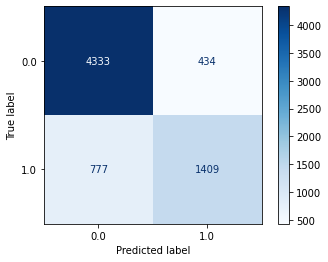

In [179]:
plot_confusion_matrix(kNN, X_train, y_train, cmap=plt.cm.Blues)

На тестовой выборке

In [180]:
y_train_prediction = kNN.predict(X_train)
confusion_matrix(y_test, y_test_prediction)

array([[1802,  234],
       [ 367,  577]], dtype=int64)

c:\Users\Olyni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


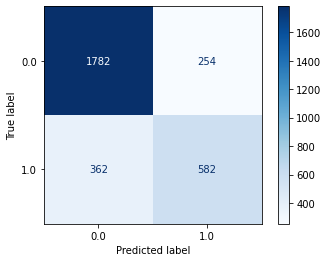

In [181]:
plot_confusion_matrix(kNN, X_test, y_test, cmap=plt.cm.Blues)

In [182]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_prediction)
MSE_test  = mean_squared_error(y_test,  y_test_prediction)
R2_train = r2_score(y_train, y_train_prediction)
R2_test  = r2_score(y_test,  y_test_prediction)

MSE_train, MSE_test, R2_train, R2_test

(0.1741694232705307,
 0.2016778523489933,
 0.19198194893952025,
 0.06816081715560596)

In [183]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(0.4173361034831886, 0.4490855735257962)

**Вывод**: Исходя из результатов можно сказать, что определять людей класса 0 (не попадут под страховой случай) получается в разы лучше, чем альтернативных класса 1 (попадут под страховой случай). Это обусловлено преобладанием 0-го класса в исходных данных. Тем не менее ошибка довольно большая, и много людей по ошибке относятся к классу 0, что приведет к потере немалого количества денег на страховых выплатах. Но с учетом того, что до анализа данных мы и так бы им выдали страховку: резальтат кажется не таким плачевным, ведь часть 1-го класса отсеяно. Однако, также какое-то количество людей, не сильно меньше, чем к 0-ому, было по ошибке отнесено к классу 1, что просто сократит прибыль, а это просто недопустимо в бизнесе!

Метод ближайших соседей не достаточно хорошо проявил себя в данной задаче классификации. Чтобы зарабатывать деньги на выдаче страховок все таки значение ошибки не достаточно низкое

## 9. Запуск других классификаторов

Теперь проанализируем, как с данной задачей классификации справляются другие классфикаторы

### Машина опорных векторов

In [184]:
from sklearn.svm import SVC
model = SVC(gamma="auto")
model.fit(X_train, y_train)
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [185]:
y_train_pred_svc = model.predict(X_train)
y_test_pred_svc = model.predict(X_test)
1 - model.score(X_train, y_train), 1 - model.score(X_test, y_test)

(0.15173306486408744, 0.17214765100671137)

Значения ошибок уменьшились

### Random Forest / Случайный лес

In [186]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

y_train_pred_svc = rf.predict(X_train)
y_test_pred_svc = rf.predict(X_test)
1 - rf.score(X_train, y_train), 1 - rf.score(X_test, y_test)

(0.0, 0.16543624161073822)

Эксперимент. Перебор значений глубины дерева вручную

In [187]:
depths = np.arange(1, 30)
train_errs = []
validate_errs = []
best_depth = 1
# Разделение на тренировочные и проверочные данные
X_train_train, X_validate, y_train_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
for depth in depths:
    rf_f = RandomForestClassifier(max_depth = depth)
    rf_f.fit(X_train_train, y_train_train)
    train_errs.append(1 - rf_f.score(X_train_train, y_train_train))
    validate_err = 1 - rf_f.score(X_validate, y_validate)
    try:
        if validate_err < validate_errs[-1]:
            best_depth = depth
    except:
        pass
    validate_errs.append(1 - rf_f.score(X_validate, y_validate))

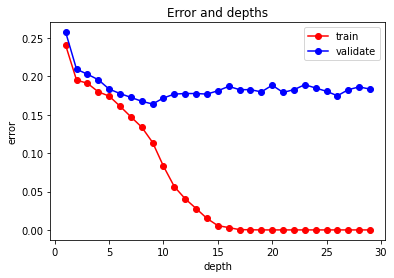

In [188]:
plt.plot(depths, train_errs, 'r-o', label = 'train')
plt.plot(depths, validate_errs, 'b-o', label = 'validate')
plt.title('Error and depths')
plt.xlabel('depth')
plt.ylabel('error')
plt.legend()
plt.show()

In [189]:
min_train_err = np.min(train_errs)
min_validate_err = np.min(validate_errs)
min_train_err, min_validate_err, best_depth

(0.0, 0.16391085549964057, 29)

In [190]:
rf_res = RandomForestClassifier(max_depth = best_depth)
rf_res.fit(X_train, y_train)
1 - rf_res.score(X_test, y_test)

0.16476510067114092

Значение ошибки ровно такое же, как в начале, вероятно получить ошибку еще меньше у этого алгоритма не получится

### Extremely Randomized Trees

In [191]:
from sklearn.ensemble import ExtraTreesClassifier
ert = ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

y_train_pred_ext = ert.predict(X_train)
y_test_pred_ext = ert.predict(X_test)
1 - ert.score(X_train, y_train), 1 - ert.score(X_test, y_test)

(0.0, 0.18187919463087243)

### AdaBoost

In [192]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 1000).fit(X_train, y_train)

y_train_pred_ada = ada.predict(X_train)
y_test_pred_ada = ada.predict(X_test)
1 - ada.score(X_train, y_train), 1 - ada.score(X_test, y_test)

(0.13145404861210985, 0.16510067114093963)

Наименьшее значение с первого раза

### GBT

In [193]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators = 1000).fit(X_train, y_train)

y_train_pred_agbt = gbt.predict(X_train)
y_test_pred_gbt = gbt.predict(X_test)
1 - gbt.score(X_train, y_train), 1 - gbt.score(X_test, y_test)

(0.0605494031353373, 0.1620805369127517)

**Вывод**: Из алгоритмов классификации, испробованных выше наилучший результат показал алгорит градиентного спуска

## 10. Борьба с несбалансированностью классов

In [194]:
data.head()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
0,0.238554,0,0,0.860867,1.0,0,0.0,1.0,-0.506046,0.095561,...,0,0,0,1,0,0,0,0,1,0
1,0.862021,1,0,-1.210609,0.0,1,0.0,0.0,-0.506046,1.592137,...,0,0,0,0,1,0,0,1,0,0
2,-1.035714,0,0,-0.176753,1.0,1,0.0,0.0,-0.506046,-0.278584,...,0,0,0,1,0,0,0,0,0,1
3,-0.073977,1,0,-2.369359,1.0,1,0.0,1.0,0.682451,-0.278584,...,0,0,0,0,0,1,0,0,0,1
4,0.797549,1,0,-0.976874,1.0,1,0.0,0.0,0.682451,0.095561,...,1,0,0,0,1,0,0,0,0,1


<AxesSubplot:xlabel='OUTCOME', ylabel='count'>

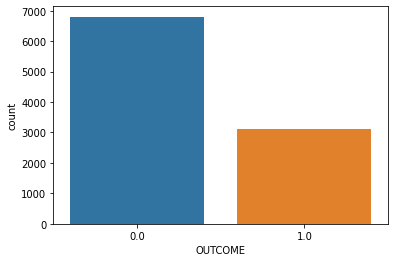

In [195]:
sns.countplot(data, x="OUTCOME")

Класс 0 сильно доминирует над классом 1. Попробуем просто выкинуть излишек, чтобы привести датасет к балансу этих классов

In [196]:
class_0 = int((data[data["OUTCOME"] == 0])["OUTCOME"].value_counts())
class_1 = int((data[data["OUTCOME"] == 1])["OUTCOME"].value_counts())
class_0 - class_1

3673

In [197]:
data_balanced = data.copy()
data_balanced = data_balanced.drop(data_balanced.loc[data_balanced["OUTCOME"] == 0].sample(n=class_0 - class_1).index)
data_balanced["OUTCOME"].value_counts()

1.0    3130
0.0    3130
Name: OUTCOME, dtype: int64

### Метод k ближайших соседей

In [198]:
X = data_balanced.drop("OUTCOME", axis=1)
y = data_balanced["OUTCOME"]
X = X.to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4382, 29), (1878, 29), (4382,), (1878,))

In [199]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(X_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [200]:
y_train_prediction = kNN.predict(X_train)
err_train = 1 - kNN.score(X_train, y_train)
err_train

0.17526243724326795

In [201]:
y_test_prediction = kNN.predict(X_test)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.2119275825346113

In [202]:
from sklearn.model_selection import GridSearchCV
nnb = [i for i in range(1, 50)]
knn = KNeighborsClassifier(n_neighbors=10)

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
best_cv_err, best_n_neighbors

(0.1971801832724852, 34)

In [203]:
kNN = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.20234291799787008

In [204]:
y_test_prediction = kNN.predict(X_test)
confusion_matrix(y_test, y_test_prediction)

array([[718, 198],
       [182, 780]], dtype=int64)

c:\Users\Olyni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


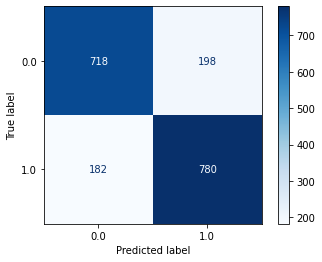

In [205]:
plot_confusion_matrix(kNN, X_test, y_test, cmap=plt.cm.Blues)

**Вывод**: Сбалансированность классов закономерно привела к увеличению ошибки *0.2067* to *0.2076*. Закономерно потому что метод, который мы применили (просто выкинуть элементы) достаточно топорный. Ведь чем меньше значений класса 0, тем более существенным становится ошибка отнесения 1-го класса по ошибке к классу 0 (значений класса 1 не уменьшилось, но мы продолжили ошибаться). Однако, мы видим, что алгоритм не попал в эту ловушку с головой и действительно начал определять класс 1 даже лучше, чем класс 0.

## 11. Исключение коррелированных переменных

На самом деле поиск и отбор признаков в исходных данных является важнейшим этапом обучения.

В чем проблема коррелирующих признаков?

Ответ: увеличение времени обучения и снижение производительности обощения данных из-за высокой дисперсии и меньшей интерпретируемости

В пункте 2 мы уже обсуждали какие признаки коррелируют друг с другом. Давайте попробуем их удалить и посмотреть на результат. А именно удалим: `MARRIED`, `CHILDREN`, `PAST_ACCIDENTS`

In [206]:
data.columns

Index(['ID', 'GENDER', 'RACE', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
       'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE',
       'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS',
       'OUTCOME', 'AGE_16-25', 'AGE_26-39', 'AGE_40-64', 'AGE_65+',
       'DRIVING_EXPERIENCE_0-9y', 'DRIVING_EXPERIENCE_10-19y',
       'DRIVING_EXPERIENCE_20-29y', 'DRIVING_EXPERIENCE_30y+',
       'EDUCATION_high school', 'EDUCATION_none', 'EDUCATION_university',
       'INCOME_middle class', 'INCOME_poverty', 'INCOME_upper class',
       'INCOME_working class'],
      dtype='object')

In [207]:
X = data.drop(["MARRIED", "CHILDREN", "PAST_ACCIDENTS", "OUTCOME"], axis=1)
y = data["OUTCOME"]
X.shape

(9933, 26)

In [208]:
X = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6953, 26), (2980, 26), (6953,), (2980,))

In [209]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(X_train, y_train)
kNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [210]:
y_train_prediction = kNN.predict(X_train)
err_train = 1 - kNN.score(X_train, y_train)
err_train

0.15705450884510286

In [211]:
y_test_prediction = kNN.predict(X_test)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.2067114093959731

In [212]:
from sklearn.model_selection import GridSearchCV
nnb = [i for i in range(1, 50)]
knn = KNeighborsClassifier(n_neighbors=10)

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
best_cv_err, best_n_neighbors

(0.18093029025055818, 21)

In [213]:
kNN = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)
err_test = 1 - kNN.score(X_test, y_test)
err_test

0.20234899328859057

c:\Users\Olyni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


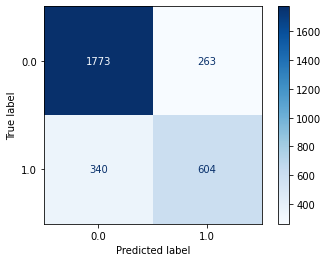

In [214]:
y_test_prediction = kNN.predict(X_test)
confusion_matrix(y_test, y_test_prediction)
plot_confusion_matrix(kNN, X_test, y_test, cmap=plt.cm.Blues)

Результаты получились несколько хуже, чем до исключения коррелириующих данных. Возможно, сказалось наличие ненужных в плане информативности признаков, например, из `ID` очень трудно извлечь полезную информацию

Сохраним полученную выборку в массивах numpy, чтобы мочь сразу загрузить ее в следующей домашней работе

In [215]:
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

# 01. Домашнняя работа. Обучение полносвязной нейронной сети

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Загружаем обучающую и тестовую выборки

In [1]:
import numpy as np
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

Определяем полносвязную нейронную сеть с параметрами

In [218]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          activation = "logistic",
                          solver = "lbfgs",
                          random_state = 42,
                          max_iter=1000)
mlp_model.get_params()["solver"]

'lbfgs'

In [219]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', max_iter=1000, random_state=42,
              solver='lbfgs')

Попробуем предсказать несколько значений

In [220]:
mlp_model.predict(X_test[42:46])

array([0., 1., 0., 0.])

In [221]:
y_test[42:46]

array([0., 1., 0., 0.])

Оценим качество полученного результата

In [222]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.22248322147651006


Видим, что модель терпит переобучение, так как значение ошибки на тестовой выборке разительно выше, чем на тренировочной.

Попробуем подобрать более оптимальное значение гиперпараметра `alpha`

In [223]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,),
                              solver = "lbfgs", activation = "logistic",
                              max_iter=5000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

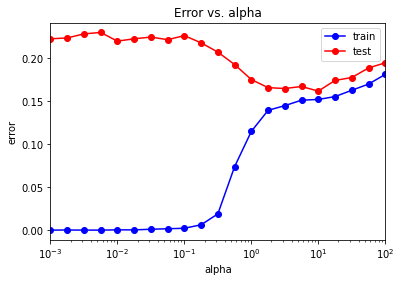

In [224]:
plt.semilogx(alpha_arr, train_err, "b-o", label = "train")
plt.semilogx(alpha_arr, test_err, "r-o", label = "test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

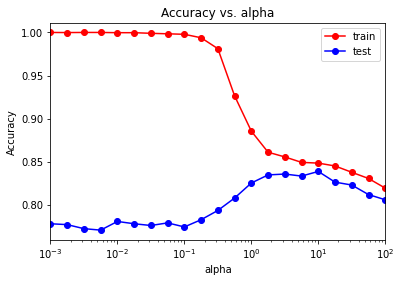

In [225]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Анализируя график зависимости error/accuracy от гиперпараметра alpha можно сделать вывод, что наиболее оптимальное значение последнего располагается в точке минимальной ошибки на тестовой и максимальной на тренировочной выборках. Вычленим его.

In [226]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("min train error", min_train_err)
print("min test error", min_test_err)

min train error 0.0
min test error 0.16140939597315437


In [227]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
alpha_opt

10.0

Таким образом, мы получили оптимальное значение гиперпараметра `alpha`. Выполним дальнейшее с его использованием и проанализируем результаты более подробно, используя матрицу.

In [228]:
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes = (100,),
                          solver = "lbfgs",
                          activation = "logistic",
                          random_state = 42,
                          max_iter=1000)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("train error", np.mean(y_train != y_train_pred))
print("test error", np.mean(y_test != y_test_pred))

train error 0.15173306486408744
test error 0.16140939597315437


[[1810  255]
 [ 226  689]]


c:\Users\Olyni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


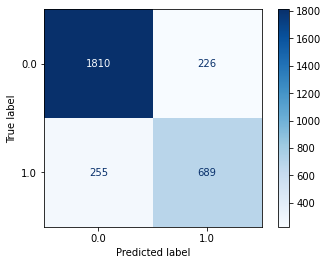

In [229]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test_pred, y_test))
plot_confusion_matrix(mlp_model, X_test, y_test, cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap=plt.cm.Blues)

In [230]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      2036
         1.0       0.75      0.73      0.74       944

    accuracy                           0.84      2980
   macro avg       0.81      0.81      0.81      2980
weighted avg       0.84      0.84      0.84      2980



Согласно последним данным, обучение модели не показало впечатляющих результатов. Возможно, стоит попробовать перебрать также количество скрытых нейронов. Сделаем же это.

In [231]:
from sklearn.metrics import accuracy_score
hidden_layers_arr = [50, 100, 150, 200, 250, 300, 350, 400]
test_err = []
train_err = []
train_acc = []
test_acc = []

for hidden_layer_sizes in hidden_layers_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = hidden_layer_sizes,
                              solver = "lbfgs", activation = "logistic",
                              max_iter=5000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

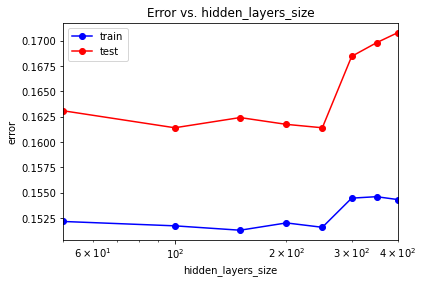

In [232]:
plt.semilogx(hidden_layers_arr, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layers_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layers_arr), np.max(hidden_layers_arr)])
plt.title('Error vs. hidden_layers_size')
plt.xlabel('hidden_layers_size')
plt.ylabel('error')
plt.legend()

Видим, что более оптимальное значение существует и немного больше, чем текущее, найдем его.

In [233]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("min train error", min_train_err)
print("min test error", min_test_err)

min train error 0.1513015964331943
min test error 0.16140939597315437


In [234]:
array = test_err == min_test_err
for i, hidden_layer in enumerate(hidden_layers_arr):
    if (array[i]):
        hidden_layer_opt = hidden_layer
hidden_layer_opt

250

Теперь обучим модель на полученных оптимальных данных

In [235]:
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes = hidden_layer_opt,
                          solver = "lbfgs",
                          activation = "logistic",
                          random_state = 42,
                          max_iter=1000)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("train error", np.mean(y_train != y_train_pred))
print("test error", np.mean(y_test != y_test_pred))

train error 0.15158924205378974
test error 0.16140939597315437


[[1809  254]
 [ 227  690]]


c:\Users\Olyni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


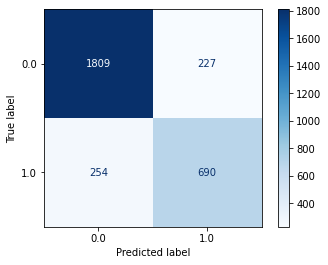

In [236]:
print(confusion_matrix(y_test_pred, y_test))
plot_confusion_matrix(mlp_model, X_test, y_test, cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap=plt.cm.Blues)

Результат незначительно, но все таки улучшился, и теперь модель предсказывает на несколько правильных значений больше.

Создадим модель с двумя слоями и посмотрим на результат ее работы

In [2]:
from sklearn.neural_network import MLPClassifier
alpha_opt = 10
hidden_layer_opt = 250
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes = (hidden_layer_opt, hidden_layer_opt),
                          activation = "logistic",
                          solver = "lbfgs",
                          random_state = 42,
                          max_iter=1000)
mlp_model.get_params()["solver"]
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("train error", np.mean(y_train != y_train_pred))
print("test error", np.mean(y_test != y_test_pred))

train error 0.15173306486408744
test error 0.16174496644295303


[[1810  256]
 [ 226  688]]


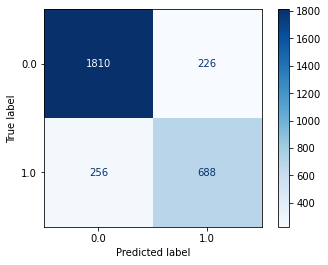

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test_pred, y_test))
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap=plt.cm.Blues)

Изменения слишком незначительны, чтобы пытаться продолжать и дальше копаться в этом направлении. Скорее всего, получить еще меньшую ошибку на этих данных нельзя.

# **Общий вывод**:

В данной работе мы познакомились с датасетом `Car Insurance Data`, любезно предоставленным одной из американских страховых компаний. Выяснили некоторые интересные подробности о поведении клиентов. Нашли и разрешили проблемы с выбросами, наличием пропущенных значений. Провели некоторую подготовку данных: векторизацию методом OneHot категориальных признаков и стандартизацию количественных. Успешно обучили модель kNN и даже немного поэкспериментировали. Также рассмотрели другие классификаторы и проблемы несбалансированности данных и ненужных коррелирующих значений.

К сожалению, полученный результат классификации в данной задаче не настолько хорош, чтобы можно было его применить в реальной жизни, так как потеря прибыли при случайном отнесении клиента к классу 1 достаточно существенная. Нейронные сети также не смогли извлечь ту самую золотую жилу (информацию) и научиться предсказывать вероятность разорения (утрировано) на страховых выплатах более точно.